### Student Information
Name: Vidar Nykvist

Student ID: X1140051

GitHub ID: v1d4r1337

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

# Load data

In [173]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


%matplotlib inline


# load data
new_data_set_file = "./newdataset/Reddit-stock-sentiment.csv"
df = pd.read_csv(new_data_set_file)
print(df.columns)
# explore columns and keep the ones we are interested in
df = df[["text", "label", "subreddit"]]

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')


[nltk_data] Downloading package punkt to /home/oogway/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data exploration

### Exercise 1 

In [174]:
print(df.sample(n=10))
print("\n")

i = 1
linebreaker = "="*30
for text in df.head(n=5)["text"]:
    print(f"{linebreaker} Begin number: {i} {linebreaker}")
    print(f"{text}")
    print(f"{linebreaker} End number: {i} {linebreaker} \n")
    i=i+1


                                                  text  label  \
639  question -- if the dollar is 'falling' relativ...    0.0   
762  Isn’t Revelation a warning against fascism? It...    0.0   
590  *That didn't happen.*\n\n*And if it did, it wa...    0.0   
705  Expecting the PR to be dropped any day on the ...    1.0   
558                              Who cares? Screw ‘em.    0.0   
747  Ask our SC how they feel about it: “Way to go ...    1.0   
101                Worry about your own country buddy.    0.0   
525  Someone should tell the trump administration t...   -1.0   
506       I mean, I'm making money on silver. But, ok.    1.0   
708            He belongs in jail but that’s old news.    0.0   

            subreddit  
639       StockMarket  
762       StockMarket  
590            stocks  
705  stockstobuytoday  
558            stocks  
747       StockMarket  
101            stocks  
525       StockMarket  
506            stocks  
708       StockMarket  


==================

### Exercise 2

In [175]:
print(type(df))
print(df.columns)
print(df.head(n=10)["text"])
print(df.head(n=10)["label"])
print(df.tail(n=10)["subreddit"])


<class 'pandas.core.frame.DataFrame'>
Index(['text', 'label', 'subreddit'], dtype='object')
0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object
0   -1.0
1    0.0
2    0.0
3    1.0
4   -1.0
5    0.0
6   -1.0
7    0.0
8    1.0
9    1.0
Name: label, dtype: float64
837              stocks
838    stockstobuytoday
839         StockMarket
840         StockMarket
841         StockMarket
842    stockstobuytoday
843         StockMarket
844    stockstobuytoday
845      wallstreetbet

### Exercise 3

In [176]:
# Lets look at wallstreetbets
df[df["subreddit"]=="wallstreetbets"][::10].head(n=5)


,text,label,subreddit
0,Calls on retards,-1.0,wallstreetbets
40,These China AI factory memes are pretty good. ...,0.0,wallstreetbets
96,200k loss in a month.. haha,-1.0,wallstreetbets
183,My resume isn't even read by companies anymore...,-1.0,wallstreetbets
227,#Ban Bet Lost\n\n/u/Local-Wall-4359 made a bet...,0.0,wallstreetbets


# Data mining

In [177]:
# Check for empty elements

dups_df = df[df.duplicated()==True]
print(dups_df)
print(len(dups_df))

df.isnull().apply(lambda x: dmh.check_missing_values(x))

                                                  text  label  \
42   So they went from saying redditors are bad for...    1.0   
349       Updated Daily by EOD\n\n  \n[Daily Shorts]()    0.0   
352  how does the futures market look today\n\nSPY,...    0.0   
387  This data is from FINRA ATS - Updated Weekly\n...    0.0   
432  &#x200B;\n\n [Cryptocurrency Prices, Charts, D...    0.0   
438  Summarized with Highlights, updated weekly be ...    0.0   
462  This data is from FINRA ATS - Updated Weekly\n...    0.0   
473  how does the futures market look today\n\nSPY,...    0.0   
520       Updated Daily by EOD\n\n  \n[Daily Shorts]()    0.0   
541  \n\n [Threshold (stockbuyvest.com)]() \n\n$AMC...    0.0   
583  Stocks that are trending up today\n\n [Popping...    0.0   
588  This data is from FINRA ATS - Updated Weekly\n...    0.0   
595  &#x200B;\n\n [Cryptocurrency Prices, Charts, D...    0.0   
679  &#x200B;\n\n [Cryptocurrency Prices, Charts, D...    0.0   
680         \n\n  [World 

,text,label,subreddit
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### Exercise 4

In [178]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

### Exercise 5

Should be the same as in the master file

# Data cleaning

In [179]:
# Seems like we do not have missing value in our columns but we have duplicates
# lets drop those

clean_df = df.drop_duplicates()
print(clean_df)
df = clean_df

                                                  text  label  \
0                                     Calls on retards   -1.0   
1    Stunt as in like why did they even make a big ...    0.0   
2                    Seeing lots of red in the ticker.    0.0   
3    Vision Marine Technologies Inc. is rewriting t...    1.0   
4                             He didn’t say thank you.   -1.0   
..                                                 ...    ...   
841  So countries “begging to stop the tariffs” and...    1.0   
842        Invest now it is going to shoot up tomorrow    1.0   
843                             Where can I read this?    0.0   
845  i sold my puts so i expect cheeto to declare w...   -1.0   
846                       ![img](emote|t5_2th52|31224)    0.0   

            subreddit  
0      wallstreetbets  
1      wallstreetbets  
2         StockMarket  
3    stockstobuytoday  
4         StockMarket  
..                ...  
841       StockMarket  
842  stockstobuytoday  
843

# Sampling

### Exercise 6 

In [180]:
df_sample = df.sample(n=250)
print(len(df))
print(len(df_sample))
print(df)
print(f"\n {df_sample}")

824
250
                                                  text  label  \
0                                     Calls on retards   -1.0   
1    Stunt as in like why did they even make a big ...    0.0   
2                    Seeing lots of red in the ticker.    0.0   
3    Vision Marine Technologies Inc. is rewriting t...    1.0   
4                             He didn’t say thank you.   -1.0   
..                                                 ...    ...   
841  So countries “begging to stop the tariffs” and...    1.0   
842        Invest now it is going to shoot up tomorrow    1.0   
843                             Where can I read this?    0.0   
845  i sold my puts so i expect cheeto to declare w...   -1.0   
846                       ![img](emote|t5_2th52|31224)    0.0   

            subreddit  
0      wallstreetbets  
1      wallstreetbets  
2         StockMarket  
3    stockstobuytoday  
4         StockMarket  
..                ...  
841       StockMarket  
842  stockstobuytod

### Exercise 7

<Axes: title={'center': 'Label distribution'}, xlabel='label'>

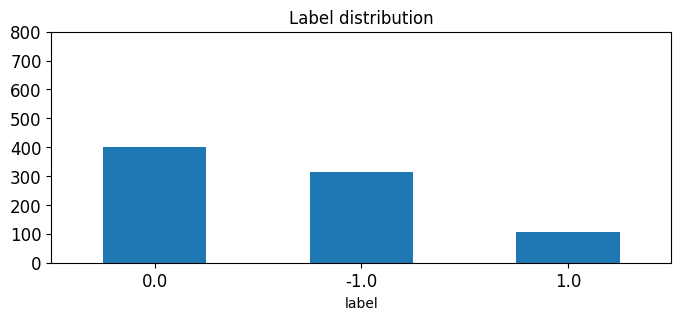

In [181]:
# Since this is a smaller dataset, maybe we dont need sampling
# But we can sample for fun and see if it has the same label distribution
# Also we can check both subreddit and label distribution

df["label"].value_counts().plot(kind = 'bar',
                                           title = 'Label distribution',
                                           ylim = [0, 800], 
                                           rot = 0, fontsize = 12, figsize = (8,3))



<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

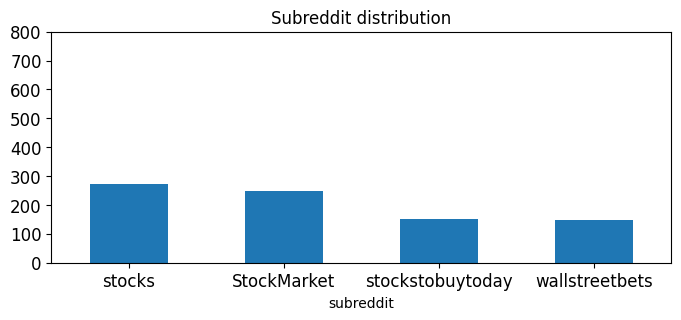

In [182]:
df["subreddit"].value_counts().plot(kind = 'bar',
                                           title = 'Subreddit distribution',
                                           ylim = [0, 800], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

<Axes: title={'center': 'Label distribution'}, xlabel='label'>

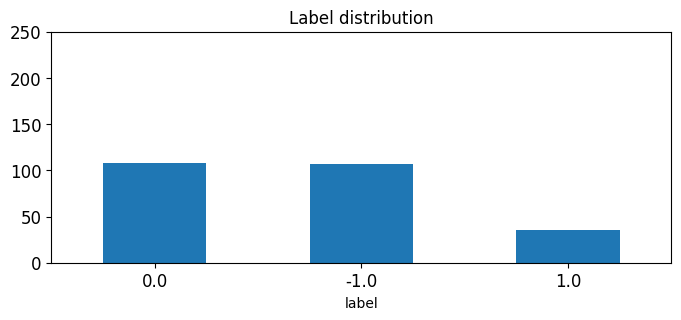

In [183]:
df_sample = df.sample(n=250)

df_sample["label"].value_counts().plot(kind = 'bar',
                                           title = 'Label distribution',
                                           ylim = [0, 250], 
                                           rot = 0, fontsize = 12, figsize = (8,3))



<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

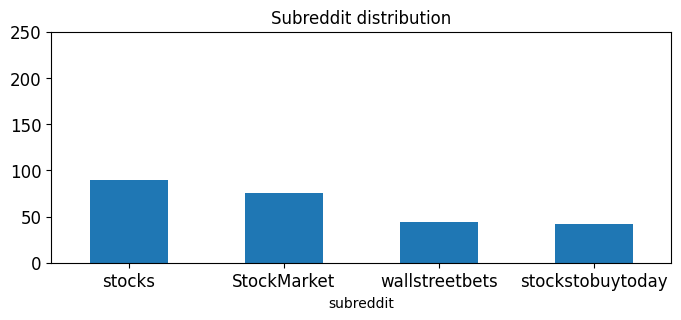

In [184]:
df_sample["subreddit"].value_counts().plot(kind = 'bar',
                                           title = 'Subreddit distribution',
                                           ylim = [0, 250], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### Exercise 8

<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

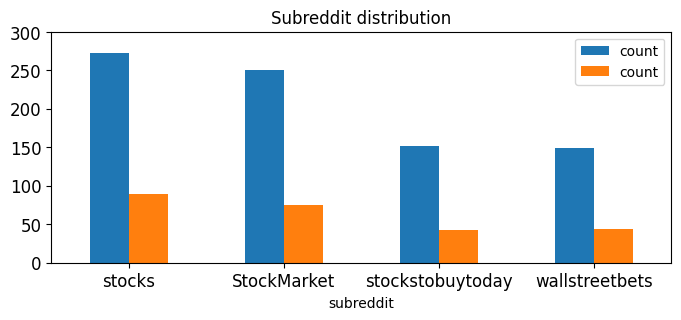

In [185]:
max_count = df["subreddit"].value_counts().max()
pd.concat([df["subreddit"].value_counts(), df_sample["subreddit"].value_counts()], axis=1).plot(kind = 'bar',
                                           title = 'Subreddit distribution',
                                           ylim = [0, max_count+max_count*0.1], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

# Feature creation 

In [186]:
# Download stop words
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /home/oogway/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Create document term matrix

In [187]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(clean_df["text"])
clean_count_vect = CountVectorizer(stop_words='english')
print(type(df_counts))


<class 'scipy.sparse._csr.csr_matrix'>


In [188]:
dt_df = pd.DataFrame(df_counts.toarray(), index=df.index) 
# we want to preserve index even after dropping duplicates
stop_words = set(stopwords.words("english"))
feature_names = count_vect.get_feature_names_out()
droplist = [i for i in dt_df.columns if feature_names[i] in stop_words]
cleaned_dt_df = dt_df.drop(droplist, axis=1)
cleaned_df_counts = clean_count_vect.fit_transform(df["text"])

print(cleaned_dt_df)



     0     1     2     3     4     5     6     7     8     9     ...  4331  \
0       0     0     0     0     0     0     0     0     0     0  ...     0   
1       0     0     0     0     0     0     0     0     0     0  ...     0   
2       0     0     0     0     0     0     0     0     0     0  ...     0   
3       0     0     0     0     0     0     0     0     0     0  ...     0   
4       0     0     0     0     0     0     0     0     0     0  ...     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
841     0     0     0     0     0     0     0     0     0     0  ...     0   
842     0     0     0     0     0     0     0     0     0     0  ...     0   
843     0     0     0     0     0     0     0     0     0     0  ...     0   
845     0     0     0     0     0     0     0     0     0     0  ...     0   
846     0     0     0     0     0     0     0     0     0     0  ...     0   

     4332  4334  4339  4340  4341  4342  4343  4344  4345  
0  

### Clean document term matrix

### Exercise 9

In [189]:
analyze = count_vect.build_analyzer()
analyze(df["text"][0])

['calls', 'on', 'retards']

# Aggregation

### Exercise 12 and 13

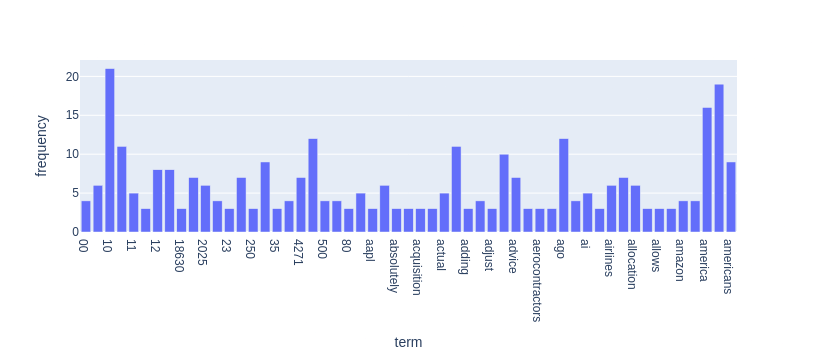

In [190]:
# we use plotly instead here

term_frequencies = np.asarray(cleaned_df_counts.sum(axis=0))[0]
tmp_df = pd.DataFrame({"term": clean_count_vect.get_feature_names_out()[:300],"frequency" :term_frequencies[:300] })
smaller_df = tmp_df[tmp_df["frequency"]>2]
# print(smaller_df)
fig = px.bar(smaller_df, x="term", y="frequency")
fig.show()

# Longtail 

### Exercise 14

In [191]:
sorted_df = smaller_df.sort_values(by="frequency", ascending=False)
fig = px.bar(sorted_df, x="term", y="frequency")
fig.show()

### Exercise 15

In [192]:
term_frequencies_log = [math.log(i) for i in term_frequencies]
tmp_df = pd.DataFrame({"term": clean_count_vect.get_feature_names_out()[:300],"frequency" :term_frequencies_log[:300] })
df_smaller = tmp_df[tmp_df["frequency"] > 1] # change threshhold when using log
df_sorted = df_smaller.sort_values(by="frequency", ascending=False)
fig = px.bar(df_sorted, x="term", y="frequency")
fig.show()

# Meaningful visualisations 

## With stop words vs without term document matrix (heatmap and bar plot) (exercise 11)

#### With stop words

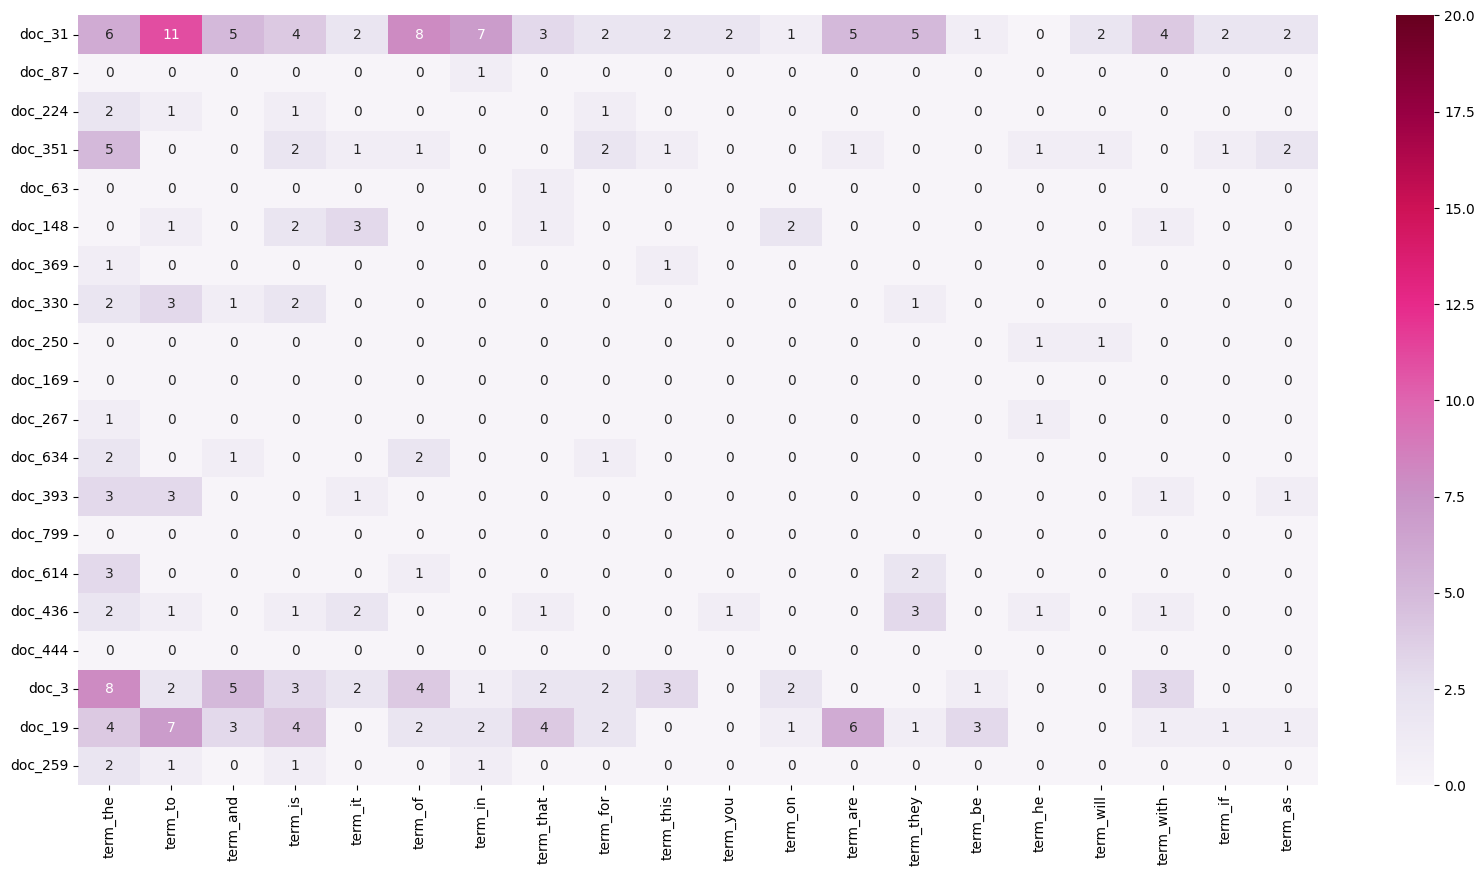

In [193]:
top_20_doc = dt_df.astype(bool).sum(axis=1).nlargest(n=20)
top_20_word = dt_df.sum(axis=0).nlargest(n=20)

plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[top_20_word.index]]
plot_y = ["doc_" + str(i) for i in top_20_doc.index]
plot_z = df_counts[top_20_doc.index][:, top_20_word.index].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 fmt="g",
                 vmin=0, vmax=20, annot=True)

#### Without stop words 

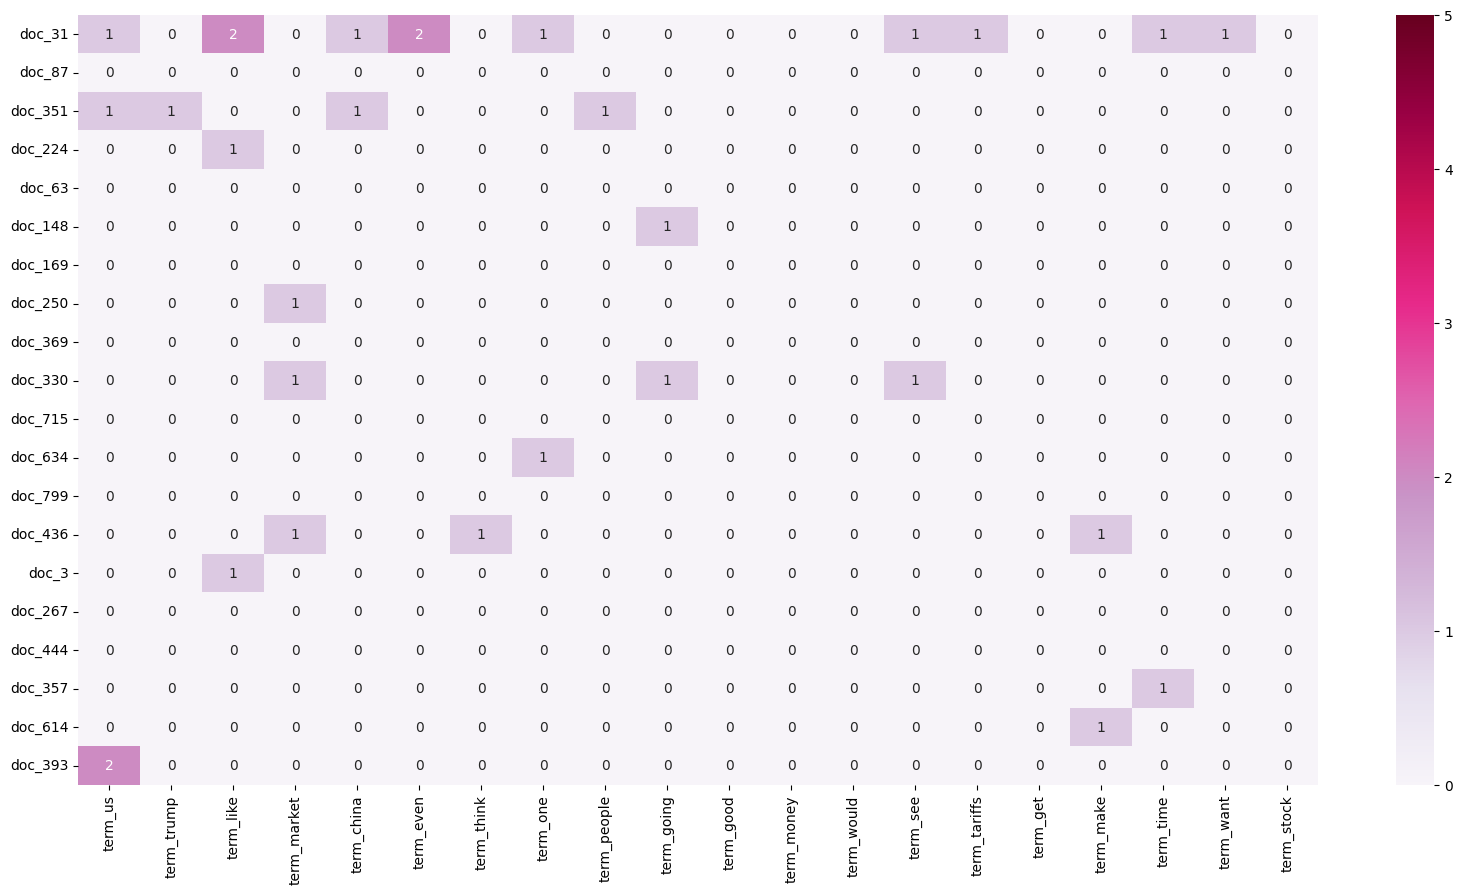

In [199]:
top_20_doc = cleaned_dt_df.astype(bool).sum(axis=1).nlargest(n=20)
top_20_word = cleaned_dt_df.sum(axis=0).nlargest(n=20)

plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[top_20_word.index]]
plot_y = ["doc_" + str(i) for i in top_20_doc.index]
plot_z = df_counts[top_20_doc.index][:, top_20_word.index].toarray() # use old index df_counts since
# cleaned_dt_df kept the same index from previous.

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 fmt="g",
                 vmin=0, vmax=5, annot=True)


## Top 20 most negative and positive associated terms (without stop words, bar plot and word cloud)

#### Most positive 

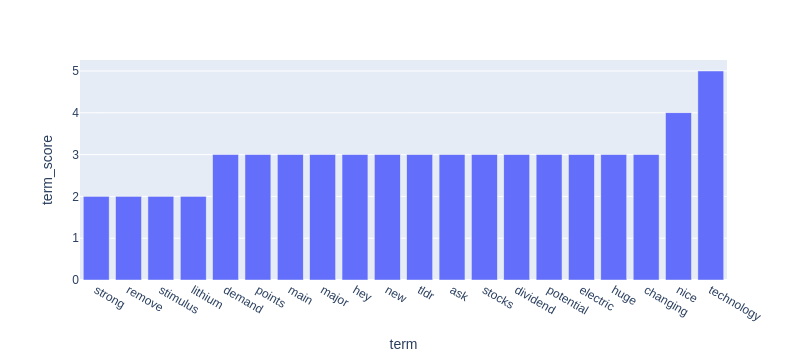

In [195]:
# not interested in stop words
labels = clean_df["label"]

# regardless how many times the term occurs in the document
# if the document has score -1 then that adds -1 to that term
binary_cleaned_dt_df = cleaned_dt_df.astype(bool)

term_score = binary_cleaned_dt_df.multiply(labels, axis=0).sum(axis=0)


top_20 = term_score.sort_values().tail(n=20)
top_20_df = pd.DataFrame({"term": count_vect.get_feature_names_out()[top_20.index],"term_score" :top_20 })
fig = px.bar(top_20_df, x="term", y="term_score")
fig.show()
# print(term_score)

#### Most negative 

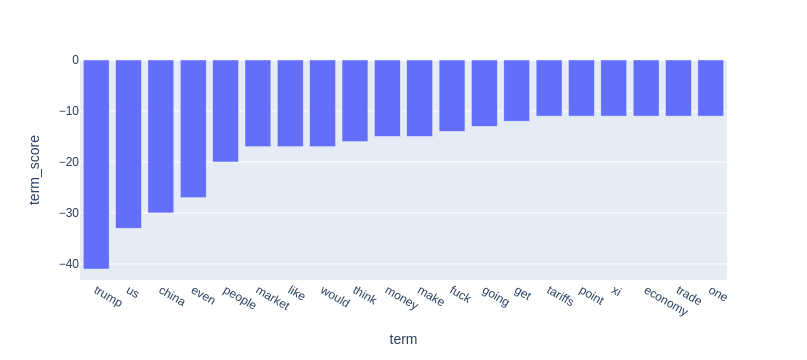

In [196]:
last_20 = term_score.sort_values().head(n=20)

last_20_df = pd.DataFrame({"term": count_vect.get_feature_names_out()[last_20.index],"term_score" :last_20 })
fig = px.bar(last_20_df, x="term", y="term_score")
fig.show()

# Phase 2

In [197]:
### Begin Assignment Here